# Multi-commodity Network Flows

Multi-commodity network flows are a mathematical model used to optimize the simultaneous routing of multiple resources through a single network. These models can be applied in various fields, including logistics, telecommunications, and urban planning to improve efficiency and resource allocation. In our example, we will explore the application of this model using a small network consisting of nodes **A, B, C, D,** and **E**, connected by directed edges with specific capacities: **A->B**, **A->D**, **B->C**, **B->D**, **C->E**, **D->C**, and **D->E**. The network includes two commodities, with the first aiming to maximize flow from node **A** to node **C**, and the second from node **A** to node **E**. Transporting each commodity through the network has a different profit per edge, and the objective is to maximize the total profit while respecting the capacity constraints of each edge.


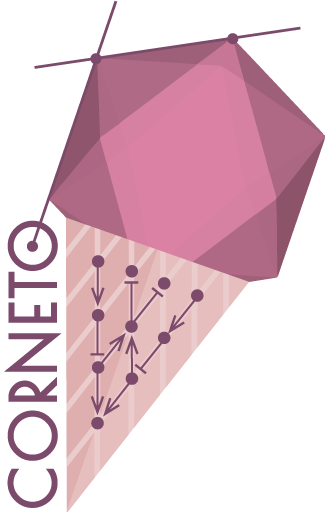

In [1]:
import corneto as cn
import numpy as np
import pandas as pd

cn.info()

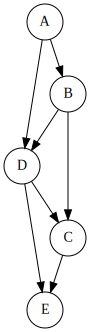

In [2]:
G = cn.Graph()
# We create the transportation network, and we add attributes to the edges.
# These attributes are the capacity of the edge, and the profit of the edge for the two commodities.
G.add_edge('A', 'B', capacity=10, profit_c1=4, profit_c2=1)
G.add_edge('A', 'D', capacity=15, profit_c1=3, profit_c2=2)
G.add_edge('B', 'C', capacity=12, profit_c1=2, profit_c2=3)
G.add_edge('B', 'D', capacity=5,  profit_c1=1, profit_c2=4)
G.add_edge('C', 'E', capacity=10, profit_c1=5, profit_c2=5)
G.add_edge('D', 'C', capacity=4,  profit_c1=2, profit_c2=6)
G.add_edge('D', 'E', capacity=8,  profit_c1=3, profit_c2=4)
G.plot()

Now we will manually create a flow graph by adding incoming edges for flow through the input vertices and outgoing flow edges for the output vertices.

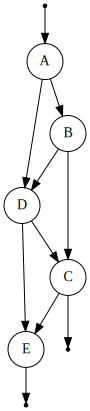

In [3]:
# First commodity, routing from A to C
G.add_edge((), 'A', capacity=1000)
G.add_edge('C', (), capacity=1000)

# Second commodity, routing from A to E.
G.add_edge('E', (), capacity=1000)

G.plot()

In [4]:
G.get_attr_from_edges('capacity')

[10, 15, 12, 5, 10, 4, 8, 1000, 1000, 1000]

In [5]:
#P.expr.flow.sum(axis=0).shape

In [6]:
# We create a flow problem with 2 flows, one per commodity
P = cn.K.Flow(G, ub = G.get_attr_from_edges('capacity'), n_flows=2, shared_bounds=True)
# NOTE: Using shared bounds links shares the capacity of the edges across flows. It is equivalent to adding this constraint here:
# P += P.expressions.flow[:, 0] + P.expressions.flow[:, 1] <= G.get_attr_from_edges('capacity')
P.expressions

{'_flow': Variable((10, 2), _flow), 'flow': Variable((10, 2), _flow)}

In [7]:
c1 = np.array(G.get_attr_from_edges('profit_c1', 0))
c2 = np.array(G.get_attr_from_edges('profit_c2', 0))

In [8]:
# Finally, we add the objective function: maximize the amount of flow per commodity, taking into account the profit
# of transporting each commodity through each edge.
P.add_objectives(sum(P.expressions.flow[:, 0].multiply(c1)), weights=-1)
P.add_objectives(sum(P.expressions.flow[:, 1].multiply(c2)), weights=-1)
P.solve(verbosity=1)

                                     CVXPY                                     
                                     v1.4.3                                    
(CVXPY) Apr 25 10:25:59 AM: Your problem has 20 variables, 5 constraints, and 0 parameters.
(CVXPY) Apr 25 10:25:59 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 25 10:25:59 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 25 10:25:59 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 25 10:25:59 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 25 10:25:59 AM: Compiling problem (target solver=SCIP).
(CVX

(CVXPY) Apr 25 10:25:59 AM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Apr 25 10:25:59 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) Apr 25 10:25:59 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


(CVXPY) Apr 25 10:25:59 AM: Your problem is compiled with the CPP canonicalization backend.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 25 10:25:59 AM: Compiling problem (target solver=SCIP).


(CVXPY) Apr 25 10:25:59 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP


(CVXPY) Apr 25 10:25:59 AM: Applying reduction Dcp2Cone


(CVXPY) Apr 25 10:25:59 AM: Applying reduction CvxAttr2Constr


(CVXPY) Apr 25 10:25:59 AM: Applying reduction ConeMatrixStuffing


(CVXPY) Apr 25 10:25:59 AM: Applying reduction SCIP


(CVXPY) Apr 25 10:25:59 AM: Finished problem compilation (took 1.218e-02 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Apr 25 10:25:59 AM: Invoking solver SCIP  to obtain a solution.


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Apr 25 10:25:59 AM: Problem status: optimal


presolving:
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (0 rounds: 0 fast, 0 medium, 0 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 20 variables (0 bin, 0 int, 0 impl, 20 cont) and 70 constraints
     70 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.0s|     1 |     0 |    16 |     - |    LP  |   0 |  20 |  70 |  30 |   0 |  0 |   0 |   0 |-1.900000e+02 |-1.900000e+02 |   0.00%| unknown
  0.0s|     1 |     0 |    16 |     - |   829k |   0 |  20 |  70 |  30 |   0 |  0 |   0 |   0 |-1.900000e+02 |-1.900000e+02 |   0.00%| unknown

SCIP Status        : problem is solved 

(CVXPY) Apr 25 10:25:59 AM: Compilation took 1.218e-02 seconds


(CVXPY) Apr 25 10:25:59 AM: Solver (including time spent in interface) took 6.527e-03 seconds
ution found]
Solving Time (sec) : 0.00
Solving Nodes      : 1
Primal Bound       : -1.90000000000000e+02 (1 solutions)
Dual Bound         : -1.90000000000000e+02
Gap                : 0.00 %


Problem(Minimize(Expression(AFFINE, UNKNOWN, ())), [Inequality(Constant(CONSTANT, ZERO, (10, 2))), Inequality(Variable((10, 2), _flow)), Equality(Expression(AFFINE, UNKNOWN, (5, 2)), Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, (10,))), Inequality(Constant(CONSTANT, ZERO, (10,)))])

In [9]:
P.objectives[0].value, P.objectives[1].value

(110.0, 80.0)

In [10]:
df_result = pd.DataFrame(P.expressions.flow.value, index=G.E, columns=['Commodity 1', 'Commodity 2'])
df_result["total"] = df_result.sum(axis=1)
df_result["capacity"] = G.get_attr_from_edges('capacity')
df_result["Profit c1"] = df_result["Commodity 1"] * c1
df_result["Profit c2"] = df_result["Commodity 2"] * c2
df_result["Total profit"] = df_result["Profit c1"] + df_result["Profit c2"]
df_result

Commodity 1  Commodity 2  total  capacity  Profit c1  Profit c2  \
(A) (B)         10.0          0.0   10.0        10       40.0        0.0   
    (D)          0.0         12.0   12.0        15        0.0       24.0   
(B) (C)         10.0          0.0   10.0        12       20.0        0.0   
    (D)          0.0          0.0    0.0         5        0.0        0.0   
(C) (E)         10.0          0.0   10.0        10       50.0        0.0   
(D) (C)          0.0          4.0    4.0         4        0.0       24.0   
    (E)          0.0          8.0    8.0         8        0.0       32.0   
()  (A)         10.0         12.0   22.0      1000        0.0        0.0   
(C) ()           0.0          4.0    4.0      1000        0.0        0.0   
(E) ()          10.0          8.0   18.0      1000        0.0        0.0   

         Total profit  
(A) (B)          40.0  
    (D)          24.0  
(B) (C)          20.0  
    (D)           0.0  
(C) (E)          50.0  
(D) (C)          24.0  
    (E)          32.0  
()  (A)           0.0  
(C) ()            0.0  
(E) ()            0.0

In [11]:
df_result["Total profit"].sum()

190.0

In [12]:
P.objectives[0].value + P.objectives[1].value

190.0